<a href="https://colab.research.google.com/github/amgothhrithik/Neutral-Network/blob/main/cat_classifier_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load data
#cat_classifier
import numpy as np
train_x = '/content/drive/My Drive/Data/cat/cat_train_x.csv'
train_y = '/content/drive/My Drive/Data/cat/cat_train_y.csv'

df1 = np.loadtxt(train_x,delimiter=",")/255.0 # Transpose directly
df2 =  np.loadtxt(train_y,delimiter=",")

In [ ]:
# Load test data
test_x = '/content/drive/My Drive/Data/cat/cat_test_x.csv'
test_y = '/content/drive/My Drive/Data/cat/cat_test_y.csv'

X_test = np.loadtxt(test_x , delimiter = ',')/255.0
Y_test = np.loadtxt(test_y, delimiter = ',').reshape(1, X_test.shape[1])

print(X_test.shape)
print(Y_test.shape)

(12288, 50)
(1, 50)


In [ ]:
x=np.array(df1)
m=x.shape[1]

y =np.array(df2)
y=y.reshape(1,m)
index=np.random.permutation(x.shape[1])
x=x[:,index]
y=y[:,index]


print("shape of training set:X",x.shape)#(12288, 209)
print("shape of training set:Y",y.shape)#(1, 209)



shape of training set:X (12288, 209)
shape of training set:Y (1, 209)


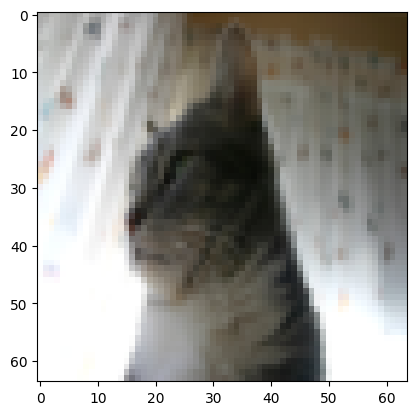

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x[:, 5].reshape(64,64, 3))
plt.show()

In [ ]:
# Activation functions
def sigmoid(z):
    # Apply clipping to avoid overflow in exp
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def softmax(x):
    x_exp = np.exp(x - np.max(x, axis=0, keepdims=True))
    return x_exp / np.sum(x_exp, axis=0, keepdims=True)

def ds(z):
    return sigmoid(z) * (1 - sigmoid(z))

def dr(z):
    return relu_derivative(z)

Epoch 0, Loss: 0.7328, Train Acc: 0.43, Test Acc: 0.58
Epoch 200, Loss: 0.5162, Train Acc: 0.79, Test Acc: 0.56
Epoch 400, Loss: 0.4021, Train Acc: 0.89, Test Acc: 0.7
Epoch 600, Loss: 0.3112, Train Acc: 0.92, Test Acc: 0.72
Epoch 800, Loss: 0.2379, Train Acc: 0.96, Test Acc: 0.74
Epoch 1000, Loss: 0.1761, Train Acc: 0.99, Test Acc: 0.7
Epoch 1200, Loss: 0.1309, Train Acc: 0.99, Test Acc: 0.7
Epoch 1400, Loss: 0.0998, Train Acc: 0.99, Test Acc: 0.72
Epoch 1600, Loss: 0.0789, Train Acc: 0.99, Test Acc: 0.72
Epoch 1800, Loss: 0.0623, Train Acc: 0.99, Test Acc: 0.72


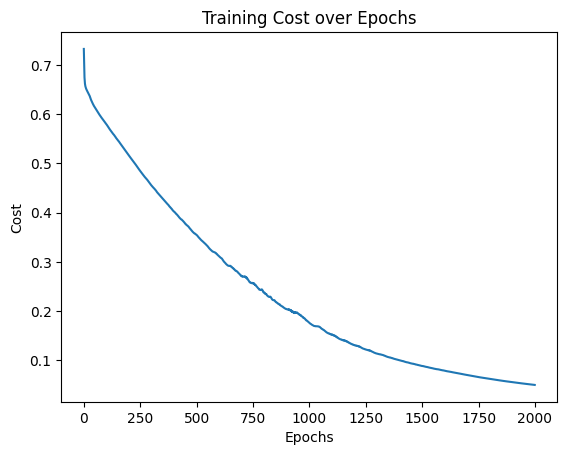

0.72


In [ ]:
#Initialization

def parameter_initiation(layers):
  parameters={}
  for i in range(1,len(layers)):
    parameters[f"W{i}"]=np.random.randn(layers[i], layers[i-1]) * np.sqrt(2/ layers[i-1])
    parameters[f"b{i}"]=np.zeros((layers[i], 1))
  return parameters


def forwardprop(X,parameters,layers_len ):
  cache={}
  cache[f"A{1}"]=X
  for i in range(1,layers_len):
    W=parameters[f"W{i}"]
    b=parameters[f"b{i}"]
    A=cache[f"A{i}"]
    Z=np.dot(W,A)+b
    cache[f"Z{i+1}"]=Z
    if i==layers_len-1:
      A=sigmoid(Z)
    else:
      A=relu(Z)
    cache[f"A{i+1}"]=A
    #print(cache)
  return cache


def backprop(cache,parameters,layers_len,Y):
  gradients={}
  for i in reversed(range(2,layers_len+1)):
    if i==layers_len:
      dZ=cache[f"A{i}"]-Y
    else:
      dA=np.dot(parameters[f"W{i}"].T,dZ)
      dZ=dA*relu_derivative(cache[f"Z{i}"])

    dW=np.dot(dZ,cache[f"A{i-1}"].T)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m

    gradients[f"dW{i-1}"]=dW
    gradients[f"db{i-1}"]=db
  return gradients

def Update(parameters,gradients,lr):

  for i in range(1,L+1):
    parameters[f"W{i}"]=parameters[f"W{i}"]-lr*gradients[f"dW{i}"]
    parameters[f"b{i}"]=parameters[f"b{i}"]-lr*gradients[f"db{i}"]
  return parameters


# Cost function (cross-entropy loss) with epsilon to avoid log(0) or log(1)
def cost(Y_pred, Y, epsilon=1e-9):
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)  # Ensures a is between epsilon and 1-epsilon
    return -np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) / Y.shape[1]


def model(X,Y,lr,epochs,layers):
  parameters=parameter_initiation(layers)
  layers_len=len(layers)
  loss=[]
  for epoch in range(epochs):
    cache=forwardprop(X,parameters,layers_len)
    Y_pred=cache[f"A{layers_len}"]
    loss_epoch=cost(Y_pred, Y, epsilon=1e-9)
    loss.append(loss_epoch)
    grads=backprop(cache,parameters,layers_len,Y)
    parameters=Update(parameters,grads,lr)
    iter=epochs//10
    if epoch % iter == 0:
           #print(f"Iteration {epoch}, Cost: {loss_epoch:.4f}")
            train_acc = predict(X, Y, parameters, layers_len)
            test_acc = predict(X_test, Y_test, parameters, layers_len)
            print(f"Epoch {epoch}, Loss: {loss_epoch:.4f}, Train Acc: {train_acc}, Test Acc: {test_acc}")
  return parameters,loss



def predict (X1,Y1,parameters,layers_len):
  cache=forwardprop(X1,parameters,layers_len)
  y1_pred=cache[f"A{len(layers)}"]
  y1_pred=np.where(y1_pred>0.5,1,0)
  acc=np.sum(Y1==y1_pred)/Y1.shape[1]
  return np.round(acc,2)


layers=[x.shape[0], 20,7,5, y.shape[0]]
lr=0.002
epochs=2000
p,l=model(x,y,lr,epochs,layers)

# Plotting the cost over iterations

t = np.arange(0, epochs)
plt.plot(t, l)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Cost over Epochs')
plt.show()


print( predict(X_test,Y_test,p,len(layers)))

# ADAM OPTIMIZER

Epoch 0, Loss: 0.7355, Train Acc: 0.45, Test Acc: 0.6
Epoch 100, Loss: 0.5158, Train Acc: 0.76, Test Acc: 0.48
Epoch 200, Loss: 0.4016, Train Acc: 0.83, Test Acc: 0.54
Epoch 300, Loss: 0.3000, Train Acc: 0.91, Test Acc: 0.62
Epoch 400, Loss: 0.1673, Train Acc: 0.97, Test Acc: 0.68
Epoch 500, Loss: 0.1178, Train Acc: 0.99, Test Acc: 0.72
Epoch 600, Loss: 0.0801, Train Acc: 1.0, Test Acc: 0.72
Epoch 700, Loss: 0.0579, Train Acc: 1.0, Test Acc: 0.68
Epoch 800, Loss: 0.0320, Train Acc: 1.0, Test Acc: 0.7
Epoch 900, Loss: 0.0224, Train Acc: 1.0, Test Acc: 0.7


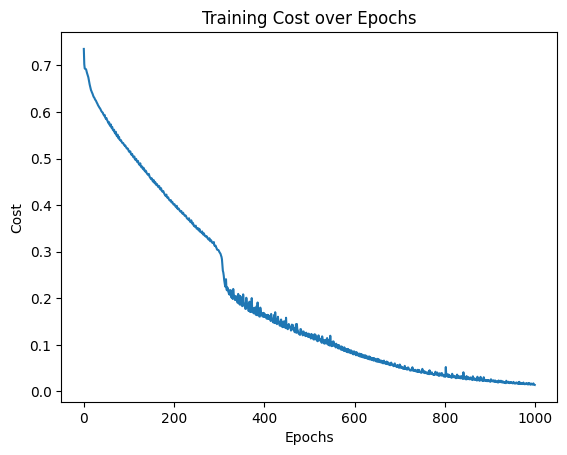

0.66


In [ ]:
#Initialization
def parameter_initiation_adam(layers):
  parameters={}
  for i in range(1,len(layers)):
    parameters[f"W{i}"]=np.random.randn(layers[i], layers[i-1]) * np.sqrt(2/ layers[i-1])
    parameters[f"b{i}"]=np.zeros((layers[i], 1))
    # Initialize Adam optimizer terms (moment estimates and variance estimates)
    parameters[f"MW{i}"]=np.zeros((layers[i], layers[i-1]))
    parameters[f"VW{i}"]=np.zeros((layers[i], layers[i-1]))
    parameters[f"Mb{i}"]=np.zeros((layers[i], 1))
    parameters[f"Vb{i}"]=np.zeros((layers[i], 1))
  return parameters


def forwardprop(X,parameters,layers_len ):
  cache={}
  cache[f"A{1}"]=X
  for i in range(1,layers_len):
    W=parameters[f"W{i}"]
    b=parameters[f"b{i}"]
    A=cache[f"A{i}"]
    Z=np.dot(W,A)+b
    cache[f"Z{i+1}"]=Z
    if i==layers_len-1:
      A=sigmoid(Z)
    else:
      A=relu(Z)
    cache[f"A{i+1}"]=A
    #print(cache)
  return cache


def backprop(cache,parameters,layers_len,Y):
  gradients={}
  for i in reversed(range(2,layers_len+1)):
    if i==layers_len:
      dZ=cache[f"A{i}"]-Y
    else:
      dA=np.dot(parameters[f"W{i}"].T,dZ)
      dZ=dA*relu_derivative(cache[f"Z{i}"])

    dW=np.dot(dZ,cache[f"A{i-1}"].T)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m

    gradients[f"dW{i-1}"]=dW
    gradients[f"db{i-1}"]=db
  return gradients

#Adam Optimizer
import numpy as np

def update_adam(parameters, gradients, lr, beta_1, beta_2, epoch):
    L = len(parameters) // 6
    for i in range(1, L + 1):
        # Update first moment estimate (MW, Mb)
        parameters[f"MW{i}"] = beta_1 * parameters[f"MW{i}"] + (1 - beta_1) * gradients[f"dW{i}"]
        parameters[f"Mb{i}"] = beta_1 * parameters[f"Mb{i}"] + (1 - beta_1) * gradients[f"db{i}"]
        # Update second moment estimate (VW, Vb)
        parameters[f"VW{i}"] = beta_2 * parameters[f"VW{i}"] + (1 - beta_2) * (gradients[f"dW{i}"] ** 2)
        parameters[f"Vb{i}"] = beta_2 * parameters[f"Vb{i}"] + (1 - beta_2) * (gradients[f"db{i}"] ** 2)
        # Compute bias-corrected moment estimates
        MW_corrected = parameters[f"MW{i}"] / (1 - beta_1 ** epoch)
        Mb_corrected = parameters[f"Mb{i}"] / (1 - beta_1 ** epoch)
        VW_corrected = parameters[f"VW{i}"] / (1 - beta_2 ** epoch)
        Vb_corrected = parameters[f"Vb{i}"] / (1 - beta_2 ** epoch)
        # Update parameters
        parameters[f"W{i}"] -= lr * MW_corrected / (np.sqrt(VW_corrected) + 1e-8)
        parameters[f"b{i}"] -= lr * Mb_corrected / (np.sqrt(Vb_corrected) + 1e-8)

    return parameters


# Cost function (cross-entropy loss) with epsilon to avoid log(0) or log(1)
def cost(Y_pred, Y, epsilon=1e-9):
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)  # Ensures a is between epsilon and 1-epsilon
    return -np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) / Y.shape[1]


def model(X,Y,lr,epochs,layers):
  parameters=parameter_initiation_adam(layers)
  layers_len=len(layers)
  loss=[]
  for epoch in range(epochs):
    cache=forwardprop(X,parameters,layers_len)
    Y_pred=cache[f"A{layers_len}"]
    loss_epoch=cost(Y_pred, Y, epsilon=1e-9)
    loss.append(loss_epoch)
    grads=backprop(cache,parameters,layers_len,Y)
    parameters=update_adam(parameters, grads, lr, 0.4, 0.4, epoch+1)
    iter=epochs//10
    if epoch % iter == 0:
           #print(f"Iteration {epoch}, Cost: {loss_epoch:.4f}")
            train_acc = predict(X, Y, parameters, layers_len)
            test_acc = predict(X_test, Y_test, parameters, layers_len)
            print(f"Epoch {epoch}, Loss: {loss_epoch:.4f}, Train Acc: {train_acc}, Test Acc: {test_acc}")
  return parameters,loss



def predict (X1,Y1,parameters,layers_len):
  cache=forwardprop(X1,parameters,layers_len)
  y1_pred=cache[f"A{layers_len}"]
  y1_pred=np.where(y1_pred>0.5,1,0)
  acc=np.sum(Y1==y1_pred)/Y1.shape[1]
  return np.round(acc,2)


layers=[x.shape[0], 20,7,5, y.shape[0]]
lr=0.0001
epochs=1000
p,l=model(x,y,lr,epochs,layers)

# Plotting the cost over iterations

t = np.arange(0, epochs)
plt.plot(t, l)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Cost over Epochs')
plt.show()


print( predict(X_test,Y_test,p,len(layers)))

# Drop_out Regularization #

In [ ]:
#Initialization drop_out Regularization

def parameter_initiation(layers):
  parameters={}
  for i in range(1,len(layers)):
    parameters[f"W{i}"]=np.random.randn(layers[i], layers[i-1]) * np.sqrt(2/ layers[i-1])
    parameters[f"b{i}"]=np.zeros((layers[i], 1))
  return parameters

def forwardprop(X,parameters,layers_len,keep_rate ):
  cache={}
  cache[f"A{1}"]=X
  Drop_out={}

  for i in range(1,layers_len):
    W=parameters[f"W{i}"]
    b=parameters[f"b{i}"]
    A=cache[f"A{i}"]
    Z=np.dot(W,A)+b
    cache[f"Z{i+1}"]=Z
    if i==layers_len-1:
      A=sigmoid(Z)
    else:
      A=relu(Z)
      Drop_out[f"D{i+1}"]=np.random.rand(A.shape[0],A.shape[1])<keep_rate
      A=A*Drop_out[f"D{i+1}"]
    cache[f"A{i+1}"]=A
    #print(cache)
  return cache,Drop_out

def backprop(cache,parameters,layers_len,Y,Drop_out,keep_rate):
  gradients={}
  for i in reversed(range(2,layers_len+1)):
    if i==layers_len:
      dZ=cache[f"A{i}"]-Y
    else:
      dA=np.dot(parameters[f"W{i}"].T,dZ)
      dA=dA*Drop_out[f"D{i}"]/keep_rate
      dZ=dA*relu_derivative(cache[f"Z{i}"])

    dW=np.dot(dZ,cache[f"A{i-1}"].T)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m

    gradients[f"dW{i-1}"]=dW
    gradients[f"db{i-1}"]=db
  return gradients


def Update(parameters,gradients,lr):
  L=len(parameters)//2
  for i in range(1,L+1):
    parameters[f"W{i}"]=parameters[f"W{i}"]-lr*gradients[f"dW{i}"]
    parameters[f"b{i}"]=parameters[f"b{i}"]-lr*gradients[f"db{i}"]
  return parameters

# Cost function (cross-entropy loss) with epsilon to avoid log(0) or log(1)
def cost(Y_pred, Y, epsilon=1e-9):
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)  # Ensures a is between epsilon and 1-epsilon
    return -np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) / Y.shape[1]

def model(X,Y,lr,epochs,layers,keep_rate):
  parameters=parameter_initiation(layers)
  layers_len=len(layers)
  loss=[]
  for epoch in range(epochs):
    cache,Drop_out=forwardprop(X,parameters,layers_len,keep_rate)
    Y_pred=cache[f"A{layers_len}"]
    loss_epoch=cost(Y_pred, Y, epsilon=1e-9)
    loss.append(loss_epoch)
    grads=backprop(cache,parameters,layers_len,Y,Drop_out,keep_rate)
    parameters=Update(parameters,grads,lr)
    iter=epochs//10
    if epoch % iter == 0:
           #print(f"Iteration {epoch}, Cost: {loss_epoch:.4f}")
           print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(epoch, np.round(loss_epoch, 2), predict(X, Y, parameters,layers_len), predict(X_test, Y_test, parameters,layers_len)))
  return parameters,loss

def predict (X1,Y1,parameters,layers_len):
  cache,Drop_out=forwardprop(X1,parameters,layers_len,1)
  y1_pred=cache[f"A{len(layers)}"]
  y1_pred=np.where(y1_pred>=0.5,1,0)
  acc=np.sum(Y1==y1_pred)/Y1.shape[1]
  return np.round(acc,2)


layers=[x.shape[0], 40, 14, 6, y.shape[0]]
lr=0.002
epochs=2000
p,l=model(x,y,lr,epochs,layers,keep_rate=0.8)


iter:0 	 cost: 0.71 	 train_acc:0.34 	 test_acc:0.66

iter:200 	 cost: 0.61 	 train_acc:0.67 	 test_acc:0.34

iter:400 	 cost: 0.57 	 train_acc:0.68 	 test_acc:0.34

iter:600 	 cost: 0.52 	 train_acc:0.72 	 test_acc:0.4

iter:800 	 cost: 0.5 	 train_acc:0.81 	 test_acc:0.54

iter:1000 	 cost: 0.46 	 train_acc:0.81 	 test_acc:0.58

iter:1200 	 cost: 0.42 	 train_acc:0.87 	 test_acc:0.66

iter:1400 	 cost: 0.38 	 train_acc:0.91 	 test_acc:0.64

iter:1600 	 cost: 0.36 	 train_acc:0.98 	 test_acc:0.74

iter:1800 	 cost: 0.35 	 train_acc:0.98 	 test_acc:0.72


# DROP_OUT REG with ADAM

In [ ]:
def parameter_initiation_adam(layers):
  parameters={}
  for i in range(1,len(layers)):
    parameters[f"W{i}"]=np.random.randn(layers[i], layers[i-1]) * np.sqrt(2/ layers[i-1])
    parameters[f"b{i}"]=np.zeros((layers[i], 1))
    # Initialize Adam optimizer terms (moment estimates and variance estimates)
    parameters[f"MW{i}"]=np.zeros((layers[i], layers[i-1]))
    parameters[f"VW{i}"]=np.zeros((layers[i], layers[i-1]))
    parameters[f"Mb{i}"]=np.zeros((layers[i], 1))
    parameters[f"Vb{i}"]=np.zeros((layers[i], 1))
  return parameters

In [ ]:
def forwardprop(X,parameters,layers_len,keep_rate ):
  cache={}
  cache[f"A{1}"]=X
  Drop_out={}

  for i in range(1,layers_len):
    W=parameters[f"W{i}"]
    b=parameters[f"b{i}"]
    A=cache[f"A{i}"]
    Z=np.dot(W,A)+b
    cache[f"Z{i+1}"]=Z
    if i==layers_len-1:
      A=sigmoid(Z)
    else:
      A=relu(Z)
      Drop_out[f"D{i+1}"]=np.random.rand(A.shape[0],A.shape[1])<keep_rate
      A=A*Drop_out[f"D{i+1}"]
    cache[f"A{i+1}"]=A
    #print(cache)
  return cache,Drop_out




In [ ]:
def backprop(cache,parameters,layers_len,Y,Drop_out,keep_rate):
  gradients={}
  for i in reversed(range(2,layers_len+1)):
    if i==layers_len:
      dZ=cache[f"A{i}"]-Y
    else:
      dA=np.dot(parameters[f"W{i}"].T,dZ)
      dA=dA*Drop_out[f"D{i}"]/keep_rate
      dZ=dA*relu_derivative(cache[f"Z{i}"])

    dW=np.dot(dZ,cache[f"A{i-1}"].T)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m

    gradients[f"dW{i-1}"]=dW
    gradients[f"db{i-1}"]=db
  return gradients




In [ ]:
#Adam Optimizer
import numpy as np

def update_adam(parameters, gradients, lr, beta_1, beta_2, epoch):
    L = len(parameters) // 6
    for i in range(1, L + 1):
        # Update first moment estimate (MW, Mb)
        parameters[f"MW{i}"] = beta_1 * parameters[f"MW{i}"] + (1 - beta_1) * gradients[f"dW{i}"]
        parameters[f"Mb{i}"] = beta_1 * parameters[f"Mb{i}"] + (1 - beta_1) * gradients[f"db{i}"]
        # Update second moment estimate (VW, Vb)
        parameters[f"VW{i}"] = beta_2 * parameters[f"VW{i}"] + (1 - beta_2) * (gradients[f"dW{i}"] ** 2)
        parameters[f"Vb{i}"] = beta_2 * parameters[f"Vb{i}"] + (1 - beta_2) * (gradients[f"db{i}"] ** 2)
        # Compute bias-corrected moment estimates
        MW_corrected = parameters[f"MW{i}"] / (1 - beta_1 ** epoch)
        Mb_corrected = parameters[f"Mb{i}"] / (1 - beta_1 ** epoch)
        VW_corrected = parameters[f"VW{i}"] / (1 - beta_2 ** epoch)
        Vb_corrected = parameters[f"Vb{i}"] / (1 - beta_2 ** epoch)
        # Update parameters
        parameters[f"W{i}"] -= lr * MW_corrected / (np.sqrt(VW_corrected) + 1e-8)
        parameters[f"b{i}"] -= lr * Mb_corrected / (np.sqrt(Vb_corrected) + 1e-8)

    return parameters


In [ ]:
# Cost function (cross-entropy loss) with epsilon to avoid log(0) or log(1)
def cost(Y_pred, Y, epsilon=1e-9):
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)  # Ensures a is between epsilon and 1-epsilon
    return -np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) / Y.shape[1]

In [ ]:
def model(X,Y,lr,epochs,layers,keep_rate):
  parameters=parameter_initiation_adam(layers)
  layers_len=len(layers)
  loss=[]
  for epoch in range(epochs):
    cache,Drop_out=forwardprop(X,parameters,layers_len,keep_rate)
    Y_pred=cache[f"A{layers_len}"]
    loss_epoch=cost(Y_pred, Y, epsilon=1e-9)
    loss.append(loss_epoch)
    grads=backprop(cache,parameters,layers_len,Y,Drop_out,keep_rate)
    parameters=update_adam(parameters, grads, lr, 0.9,0.95, epoch+1)
    iter=epochs//10
    if epoch % iter == 0:
           #print(f"Iteration {epoch}, Cost: {loss_epoch:.4f}")
           print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(epoch, np.round(loss_epoch, 2), predict(X, Y, parameters,layers_len), predict(X_test, Y_test, parameters,layers_len)))
  return parameters,loss

In [ ]:
def predict (X1,Y1,parameters,layers_len):
  cache,Drop_out=forwardprop(X1,parameters,layers_len,1)
  y1_pred=cache[f"A{len(layers)}"]
  y1_pred=np.where(y1_pred>=0.5,1,0)
  acc=np.sum(Y1==y1_pred)/Y1.shape[1]
  return np.round(acc,2)

In [ ]:
layers=[x.shape[0], 40, 14, 6, y.shape[0]]
lr=0.0002
epochs=2000
p,l=model(x,y,lr,epochs,layers,keep_rate=0.8)


iter:0 	 cost: 0.69 	 train_acc:0.66 	 test_acc:0.34

iter:200 	 cost: 0.44 	 train_acc:0.84 	 test_acc:0.62

iter:400 	 cost: 0.28 	 train_acc:1.0 	 test_acc:0.74

iter:600 	 cost: 0.19 	 train_acc:1.0 	 test_acc:0.74

iter:800 	 cost: 0.17 	 train_acc:1.0 	 test_acc:0.74

iter:1000 	 cost: 0.12 	 train_acc:1.0 	 test_acc:0.72

iter:1200 	 cost: 0.11 	 train_acc:1.0 	 test_acc:0.72

iter:1400 	 cost: 0.09 	 train_acc:1.0 	 test_acc:0.72

iter:1600 	 cost: 0.13 	 train_acc:1.0 	 test_acc:0.72

iter:1800 	 cost: 0.08 	 train_acc:1.0 	 test_acc:0.72


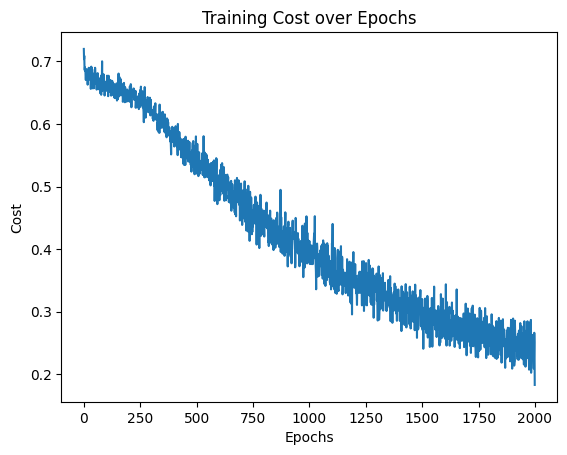

In [ ]:
# Plotting the cost over iterations

t = np.arange(0, epochs)
plt.plot(t, l)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Cost over Epochs')
plt.show()

In [ ]:
cache,Drop_out=forwardprop(X_test,p,len(layers),1)
y_pred=cache[f"A{len(layers)}"]

In [ ]:
y_pred=np.where(y_pred>0.5,1,0)
acc=np.sum(Y_test==y_pred)/Y_test.shape[1]
print(acc)

0.78
